<a href="https://colab.research.google.com/github/csabiu/Herts_Data_Science_2025/blob/main/bayes_cepheids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import (SkyCoord, Distance, Galactic,
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file
from astroquery.gaia import Gaia


(-0.1, 1.1)

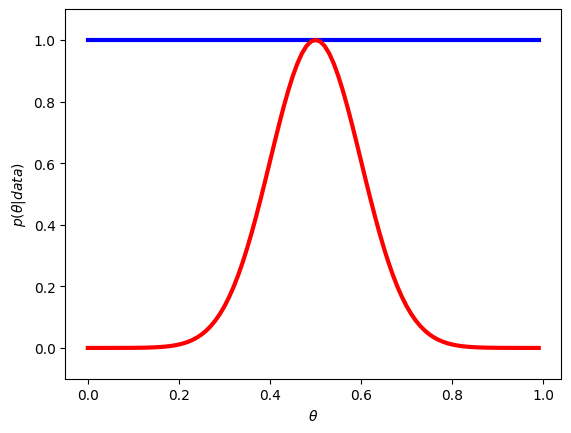

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# theta values (0,1)
t=np.arange(0,1,0.01)

# flat prior
prior1=t*0 + 1.

# gaussian prior centred on 0.5
prior2=1./(0.1*np.sqrt(2*np.pi))*np.exp(-0.5*((t-0.5)/0.1)**2)
prior2=prior2/np.max(prior2)


plt.plot(t,prior1,'b',linewidth=3)
plt.plot(t,prior2,'r',linewidth=3)

plt.ylabel(r'$p(\theta|data)$')
plt.xlabel(r'$\theta$')
plt.ylim((-.1,1.1))

Text(0.05, 1.0, 'Type I')

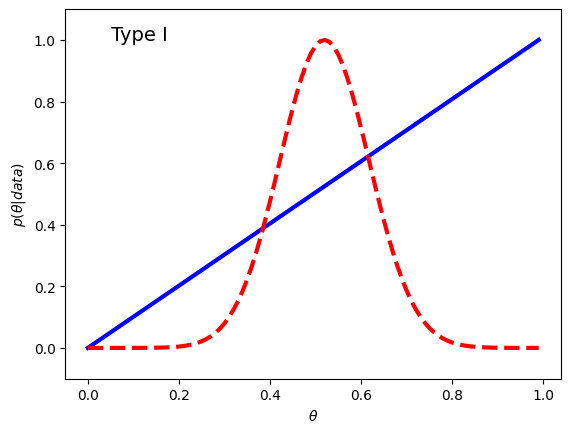

In [28]:
r=1      # number of type 1
n=1     # number of cepheids

p=t**r *(1.-t)**(n-r) # bimodal distribution
p=p/np.max(p)

prior1=prior1*p
prior1=prior1/np.max(prior1)

prior2=prior2*p
prior2=prior2/np.max(prior2)

plt.plot(t,prior1,'b',linewidth=3)
plt.plot(t,prior2,'r',linewidth=3,linestyle='--')

plt.ylabel(r'$p(\theta|data)$')
plt.xlabel(r'$\theta$')
plt.ylim((-.1,1.1))
plt.text(0.05,1.,'Type I',fontsize=14)


Text(0.05, 1.0, 'Type I + Type II')

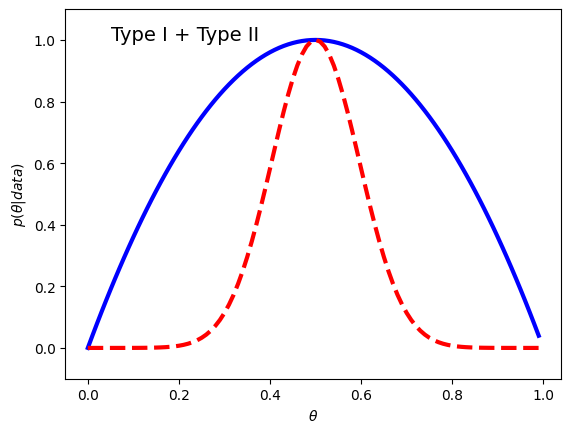

In [29]:
r=0      # number of type 1
n=1     # number of cepheids

p=t**r *(1.-t)**(n-r) # bimodal distribution
p=p/np.max(p)

prior1=prior1*p
prior1=prior1/np.max(prior1)

prior2=prior2*p
prior2=prior2/np.max(prior2)

plt.plot(t,prior1,'b',linewidth=3)
plt.plot(t,prior2,'r',linewidth=3,linestyle='--')

plt.ylabel(r'$p(\theta|data)$')
plt.xlabel(r'$\theta$')
plt.ylim((-.1,1.1))
plt.text(0.05,1.,'Type I + Type II',fontsize=14)


Text(0.05, 1.0, 'Type I + Type II \n + Type II')

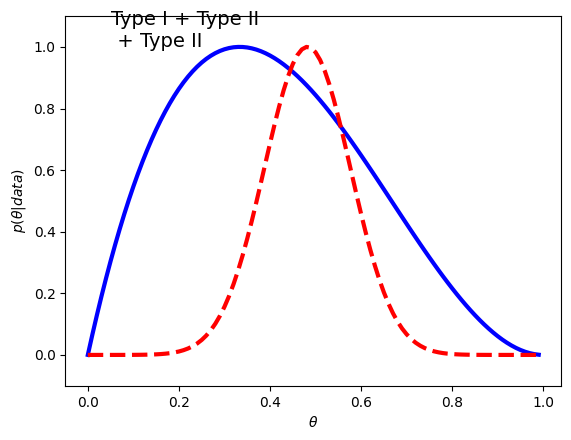

In [30]:
r=0      # number of type 1
n=1     # number of cepheids

p=t**r *(1.-t)**(n-r) # bimodal distribution
p=p/np.max(p)

prior1=prior1*p
prior1=prior1/np.max(prior1)

prior2=prior2*p
prior2=prior2/np.max(prior2)

plt.plot(t,prior1,'b',linewidth=3)
plt.plot(t,prior2,'r',linewidth=3,linestyle='--')

plt.ylabel(r'$p(\theta|data)$')
plt.xlabel(r'$\theta$')
plt.ylim((-.1,1.1))
plt.text(0.05,1.,'Type I + Type II \n + Type II',fontsize=14)

Text(0.05, 1.0, '3*Type I + 4*Type II ')

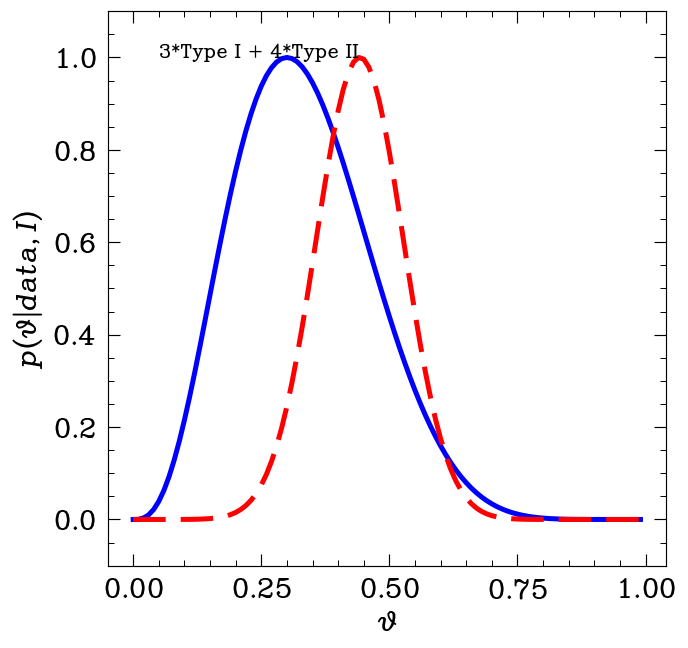

In [ ]:
r=2      # number of type 1
n=7     # number of cepheids

p=t**r *(1.-t)**(n-r) # bimodal distribution
p=p/np.max(p)

prior1=prior1*p
prior1=prior1/np.max(prior1)

prior2=prior2*p
prior2=prior2/np.max(prior2)

plt.plot(t,prior1,'b',linewidth=3)
plt.plot(t,prior2,'r',linewidth=3,linestyle='--')

plt.ylabel(r'$p(\theta|data, I)$')
plt.xlabel(r'$\theta$')
plt.ylim((-.1,1.1))
plt.text(0.05,1.,'3*Type I + 4*Type II ',fontsize=14)

Now lets look at the fraction of type 1 cepheids in the GAIA data

Start with the same 2 priors as above.

1. Make the above plot for the first 10, 100, 1000 Cepheids.

2. What can you say about the posterior distribution of $\theta$?

3. What can you say about the effect of the priors?

In [34]:
job = Gaia.launch_job_async("SELECT gaia.source_id,gaia.ref_epoch,gaia.ra,gaia.dec,gaia.l,gaia.b,gaia.parallax,gaia.pmra,gaia.pmdec, cep.type_best_classification "
                        "FROM gaiadr3.gaia_source AS gaia "
                        "JOIN gaiadr3.vari_cepheid AS cep "
                        "ON gaia.source_id=cep.source_id",
                      dump_to_file=True, output_format='votable',)


In [36]:
r = job.get_results()

ra=np.asarray(r['ra'].value)
dec=np.asarray(r['dec'].value)
par=np.asarray(r['parallax'].value)
type=np.asarray(r['type_best_classification'].value)

sn=par/par_err

print('dr3 has ',par.shape,' cepheids')


dr3 has  (15021,)  cepheids


In [40]:
#helper command
n = 20 #eg
r = np.sum(type[:n]=='DCEP')
print('dr3 has ',r,' type I cepheids from', n,' observations')

dr3 has  17  type I cepheids from 20  observations
